# PD Model Machine Learning Case Stuy
## EDA Section
### Ali Enver Arslan

In [9]:
#Import the libraries
import pickle
import missingno
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from itertools import product, combinations
from sklearn.compose import ColumnTransformer    
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, MissingIndicator
from scipy.stats import chi2_contingency, kendalltau, pointbiserialr

### Data Import

In [2]:
df = pd.read_csv("dataset.csv", sep=";")
df.head()

,uuid,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,63f69b2c-8b1c-4740-b78d-52ed9a4515ac,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0e961183-8c15-4470-9a5e-07a1bd207661,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,d8edaae6-4368-44e0-941e-8328f203e64e,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0095dfb6-a886-4e2a-b056-15ef45fdb0ef,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,c8f8b835-5647-4506-bf15-49105d8af30b,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99976 entries, 0 to 99975
Data columns (total 42 columns):
default                                89976 non-null float64
account_amount_added_12_24m            99976 non-null int64
account_days_in_dc_12_24m              88140 non-null float64
account_days_in_rem_12_24m             88140 non-null float64
account_days_in_term_12_24m            88140 non-null float64
account_incoming_debt_vs_paid_0_24m    40661 non-null float64
account_status                         45603 non-null float64
account_worst_status_0_3m              45603 non-null float64
account_worst_status_12_24m            33215 non-null float64
account_worst_status_3_6m              42274 non-null float64
account_worst_status_6_12m             39626 non-null float64
age                                    99976 non-null int64
avg_payment_span_0_12m                 76140 non-null float64
avg_payment_span_0_3m                  50671 non-null float64
merchant_category          

In [3]:
ids = df["uuid"]
df.drop("uuid", inplace=True, axis=1)
#Convert the boolean value to binary
df["has_paid"] = df["has_paid"].map({True:1, False:0})
df.head()

,default,account_amount_added_12_24m,account_days_in_dc_12_24m,account_days_in_rem_12_24m,account_days_in_term_12_24m,account_incoming_debt_vs_paid_0_24m,account_status,account_worst_status_0_3m,account_worst_status_12_24m,account_worst_status_3_6m,...,status_3rd_last_archived_0_24m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_account_0_12m,sum_capital_paid_account_12_24m,sum_paid_inv_0_12m,time_hours,worst_status_active_inv
0,0.0,0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0,...,1,1,1,1,0,0,0,178839,9.653333,1.0
1,0.0,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,1,1,2,2,0,0,0,49014,13.181389,NaN
2,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1,1,2,2,0,0,0,124839,11.561944,1.0
3,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,0,0,0,324676,15.751111,1.0
4,0.0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,0,0,7100,12.698611,NaN


In [173]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
default,89976,NaN,NaN,NaN,0.0143149,0.118786,0,0,0,0,1
account_amount_added_12_24m,99976,NaN,NaN,NaN,12255.1,35481.5,0,0,0,4937.25,1.12878e+06
account_days_in_dc_12_24m,88140,NaN,NaN,NaN,0.223043,5.80812,0,0,0,0,365
account_days_in_rem_12_24m,88140,NaN,NaN,NaN,5.04462,22.864,0,0,0,0,365
account_days_in_term_12_24m,88140,NaN,NaN,NaN,0.286896,2.92991,0,0,0,0,97
account_incoming_debt_vs_paid_0_24m,40661,NaN,NaN,NaN,1.33129,26.4823,0,0,0.152082,0.662952,3914
account_status,45603,NaN,NaN,NaN,1.04217,0.202713,1,1,1,1,4
account_worst_status_0_3m,45603,NaN,NaN,NaN,1.17291,0.420142,1,1,1,1,4
account_worst_status_12_24m,33215,NaN,NaN,NaN,1.33735,0.575043,1,1,1,2,4
account_worst_status_3_6m,42274,NaN,NaN,NaN,1.18529,0.443309,1,1,1,1,4


**Train - Test Split**

In [4]:
train, test = df[~df["default"].isnull()], df[df["default"].isnull()]
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (89976, 42)
Test Shape: (10000, 42)


In [5]:
X = train.drop("default", axis=1)
y = train["default"]

#X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify=y, test_size=0.25)

## EDA

0.0    88688
1.0     1288
Name: default, dtype: int64


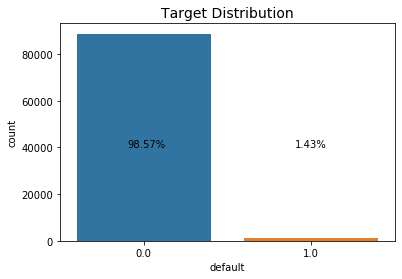

In [176]:
print(train["default"].value_counts())

sns.countplot(train['default'],label="Count")
plt.text(-0.1, 40000, "{0:.2%}".format(train[train["default"] == 0]["default"].count() / train.shape[0]))
plt.text(0.9, 40000, "{0:.2%}".format(train[train["default"] == 1]["default"].count() / train.shape[0]))
plt.title("Target Distribution", fontsize=14);

### Outlier Control

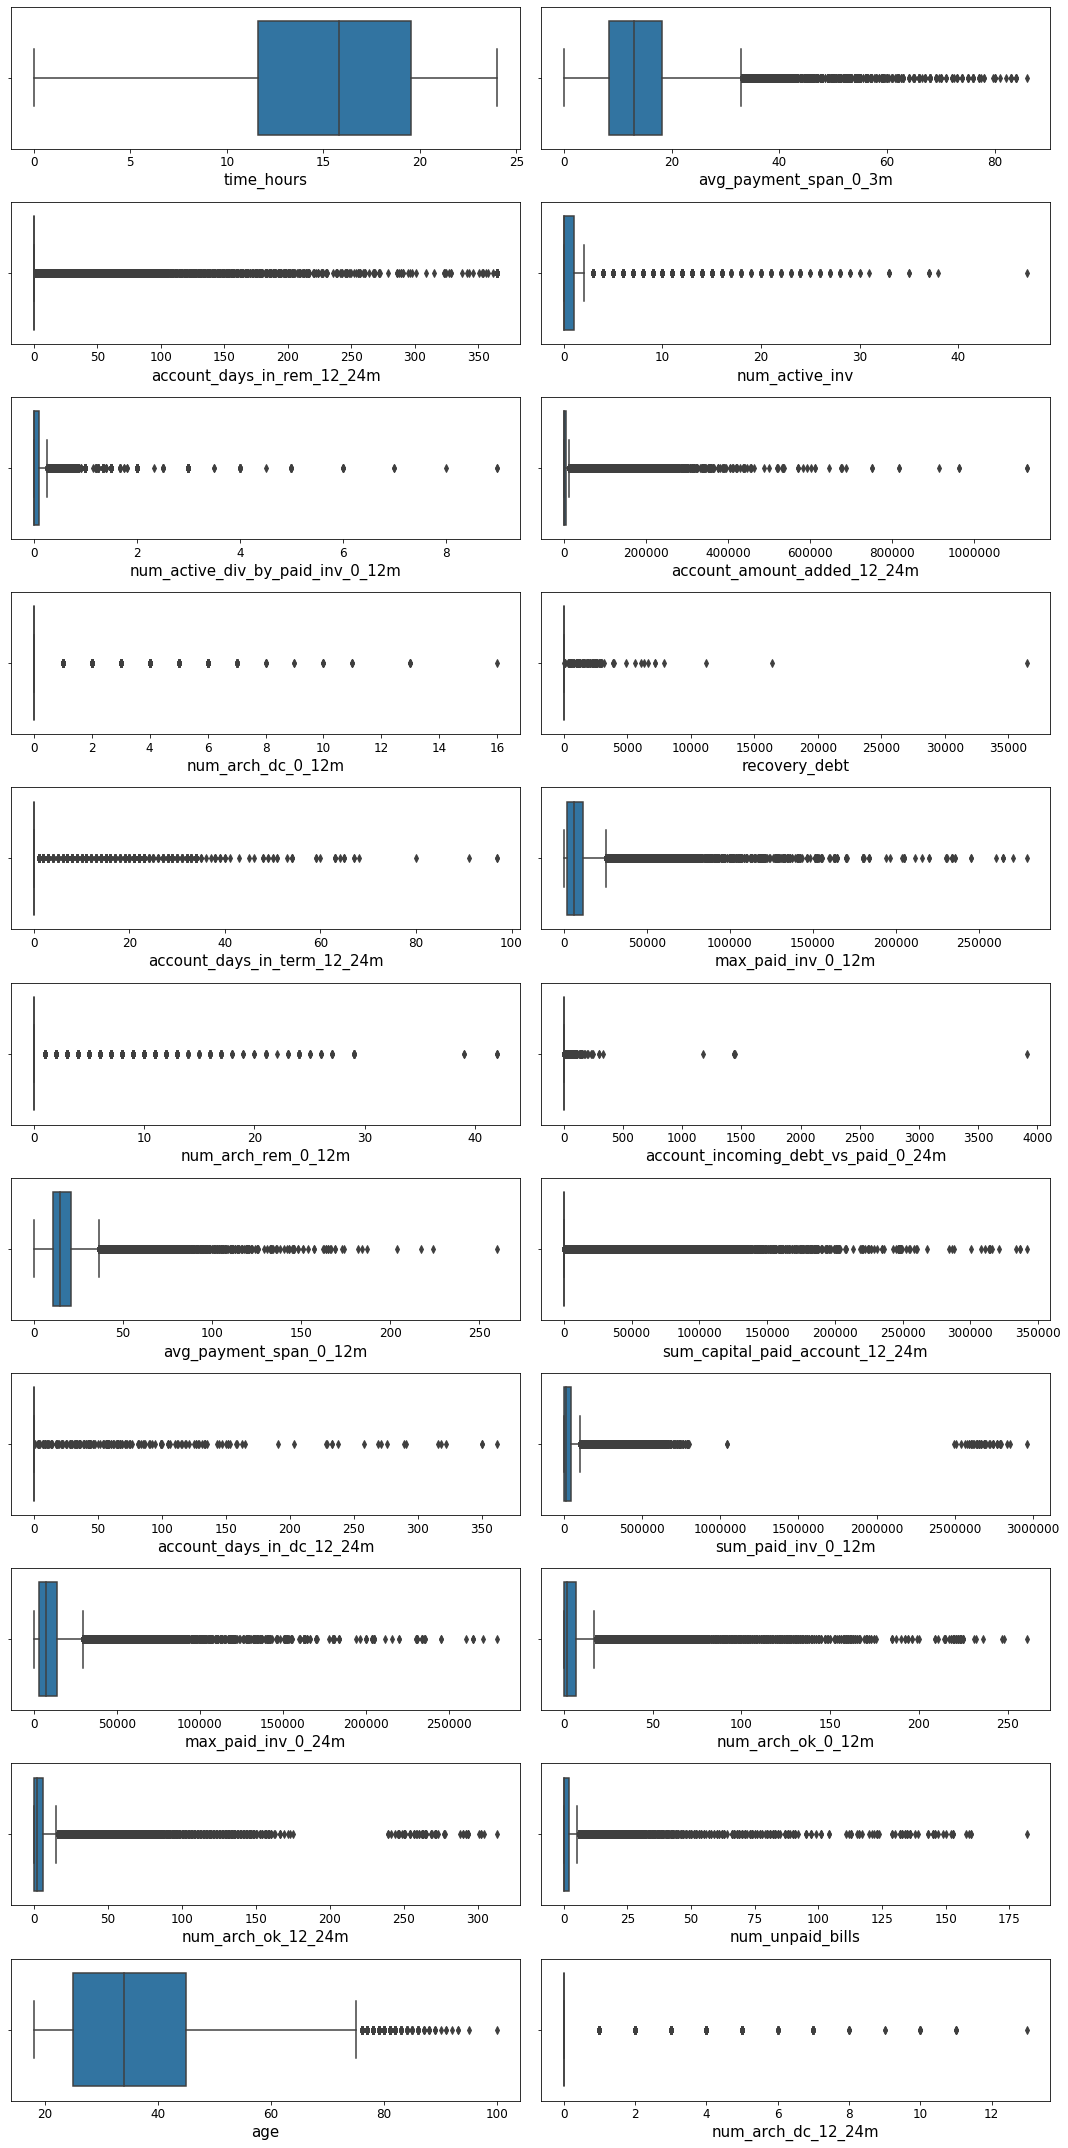

In [818]:
fig, axs = plt.subplots(int(len(num_cols)/2), 2, figsize=(15, 30))
for col, ax in zip(num_cols, product(range(int(len(num_cols)/2)), range(2))):
    b1 = sns.boxplot(train[col], ax=axs[ax[0], ax[1]])
    b1.set_xlabel(col,fontsize=15)
    plt.tight_layout()

As it can be seen from the charts above, most of the features seem to have outliers. Since there are many features with potential outlier, we might suspect that this is an expected situation and do not remove or cap the outlier values.

### Missing Control

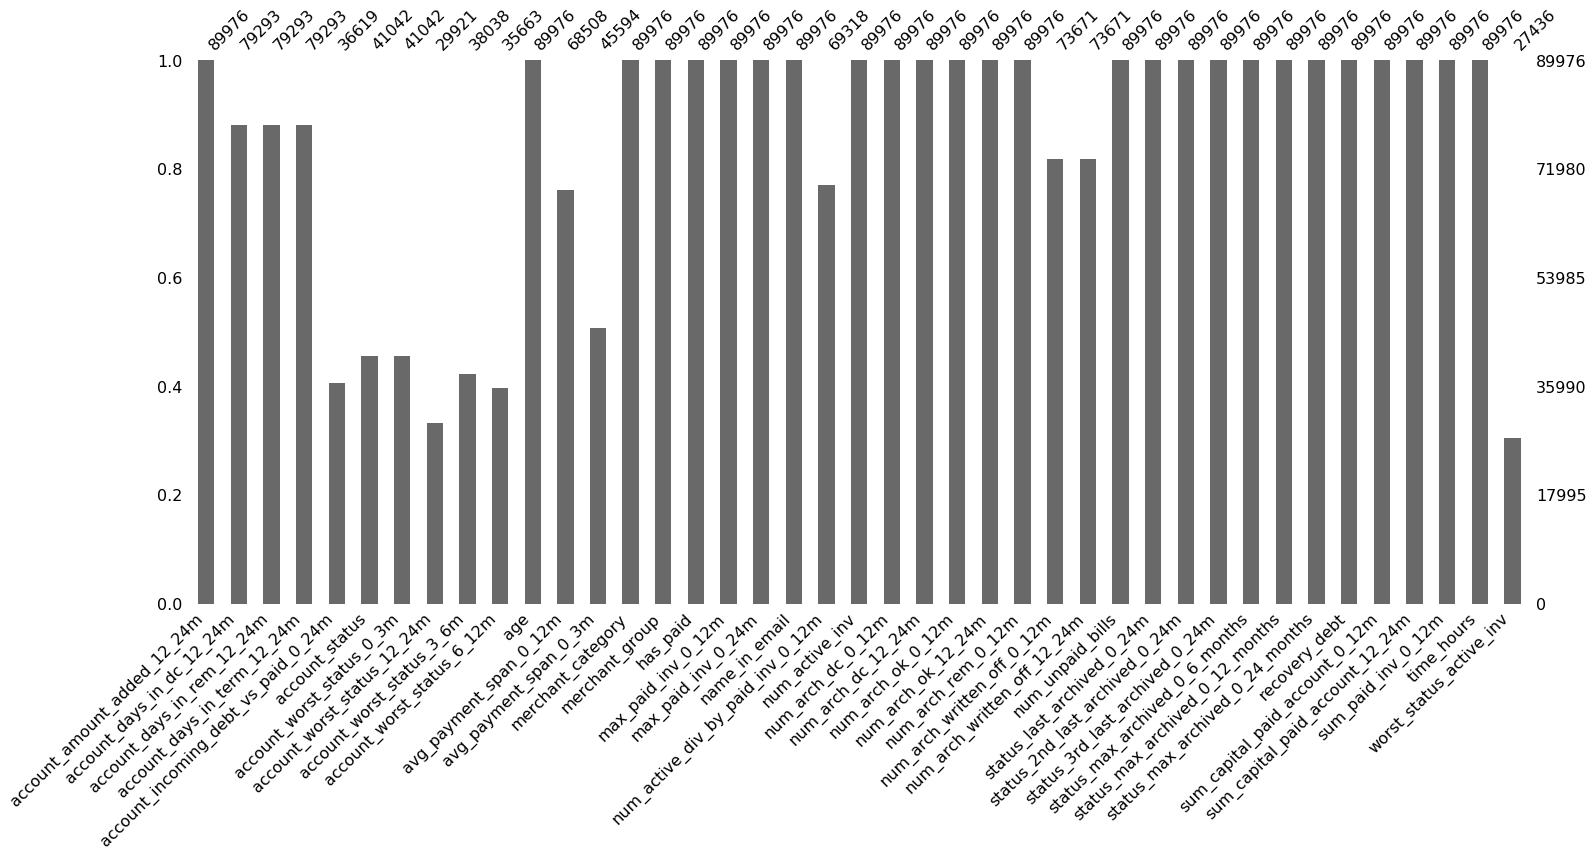

In [467]:
missingno.bar(X);

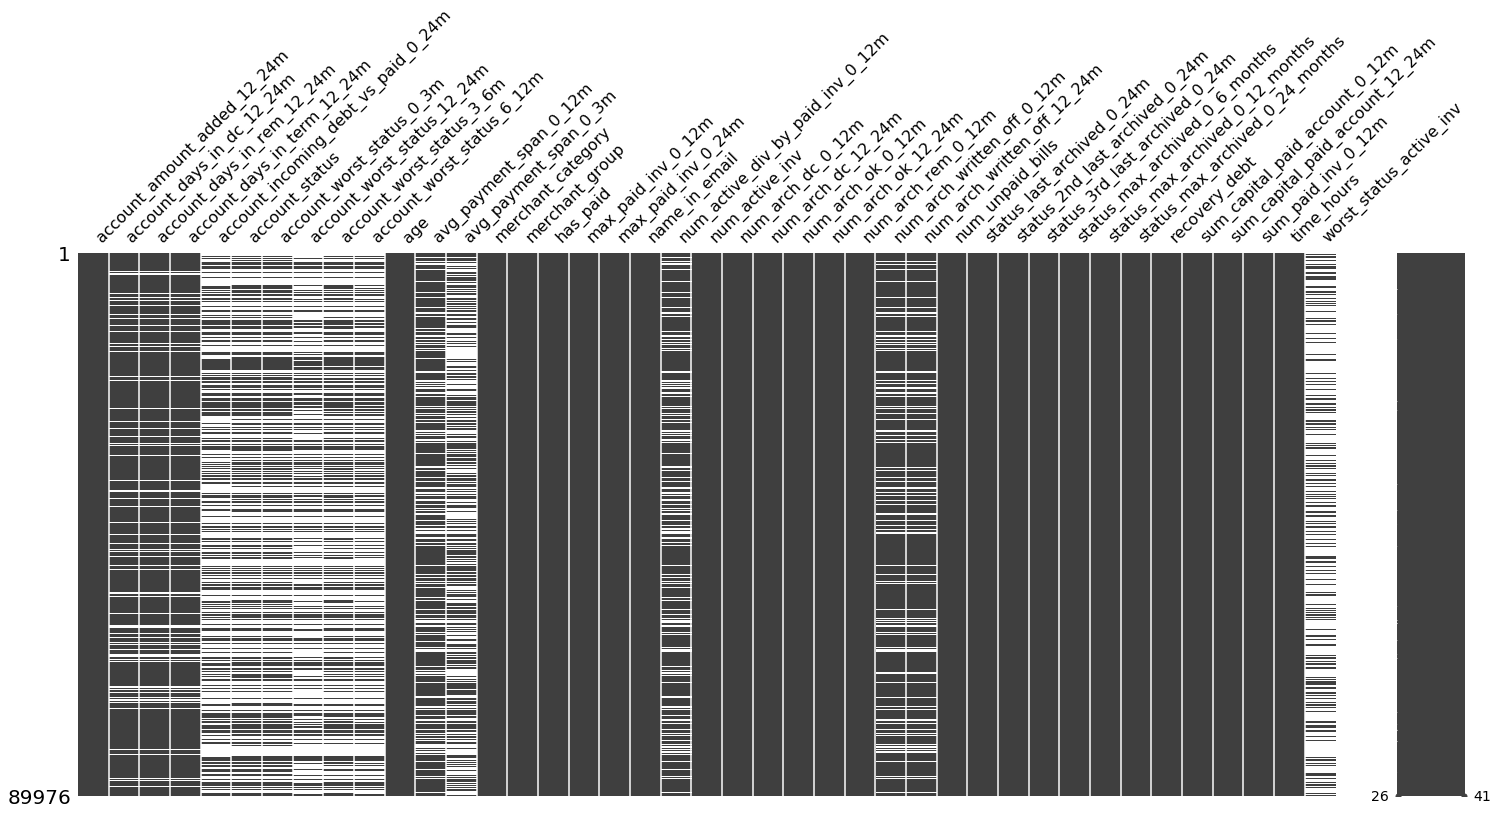

In [468]:
missingno.matrix(X);

Features below seems to be following a similar missingness patterin from the chart above.

* account_days_in_term_12_24m, 
* account_incoming_debt_vs_paid_0_24m, 
* account_status, 
* account_worst_status_0_3m, 
* account_worst_status_12_24m, 
* account_worst_status_3_6m, 
* account_worst_status_6_12m, 
* avg_payment_span_0_12m, 
* worst_status_active_inv 

And the following features might follow a similar patterin in theri missing values:

* account_amount_added_12_24m, 
* account_days_in_dc_12_24m,
* account_days_in_rem_12_24m,
* num_active_div_by_paid_inv_12_24m,
* num_arch_written_off_0_12m,
* num_arch_written_off_12_24m


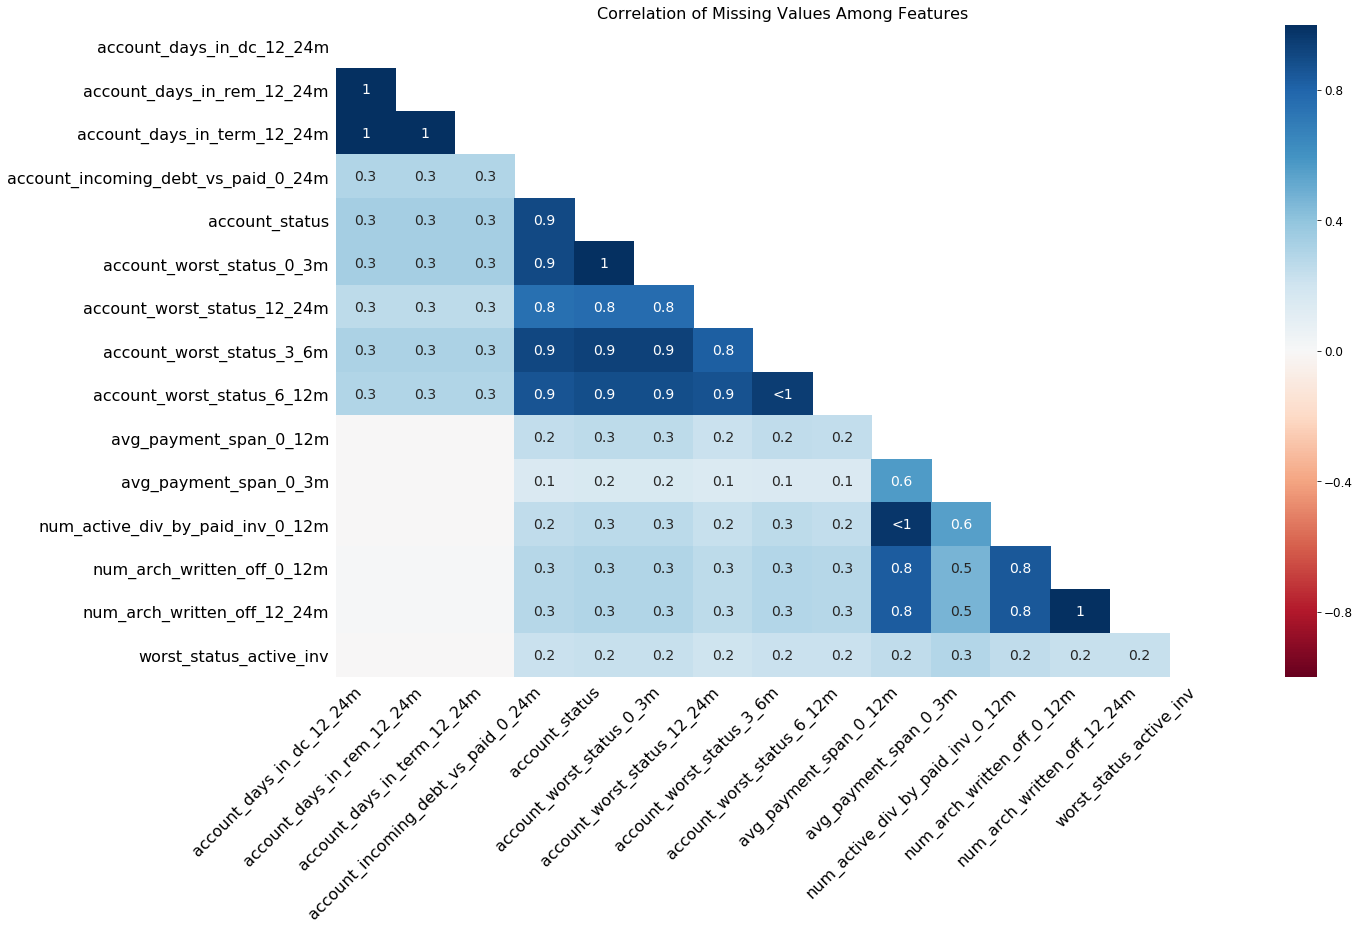

In [469]:
#Print the correlation heatmap of missing values by feature
missingno.heatmap(X)
plt.title("Correlation of Missing Values Among Features", fontsize=16);

As it can be seen from the above matrix, there is high correlation of the missing values among the features.

In [125]:
def mcarChecker(df, col):    
    import scipy.stats as stats
    df2 = df.copy()
    cat_col = col+'_cat'
    df2[cat_col] = np.where(df2[col].isnull(), 1, 0)

    features = df.drop(col, axis=1).select_dtypes(["float64", "int64"]).columns
    print('MCAR Control for: {}\n'.format(col))
    print('                         Feature   p-value      Conclusion')
    print('                         ----------------------------------')
    for feat in features:
        s1 = df[df2[cat_col] == 0][feat]
        s2 = df[df2[cat_col] == 1][feat]
        t, p_twosided = stats.ttest_ind(s1, s2, equal_var=False)
        verdict = 'Not significant'
        if p_twosided <= 0.025: 
            verdict = 'Significant'
            print('%32s   %6.4f   %15s' % (feat, p_twosided, verdict))


for col in train.select_dtypes(["float64", "int64"]).columns:
    if sum(train[col].isnull()) > 0:
        mcarChecker(train, col)
        print("="*65)

MCAR Control for: account_days_in_dc_12_24m

                         Feature   p-value      Conclusion
                         ----------------------------------
                         default   0.0000       Significant
     account_amount_added_12_24m   0.0000       Significant
                             age   0.0000       Significant
              max_paid_inv_0_12m   0.0220       Significant
              max_paid_inv_0_24m   0.0156       Significant
               num_arch_dc_0_12m   0.0000       Significant
              num_arch_dc_12_24m   0.0000       Significant
              num_arch_ok_12_24m   0.0000       Significant
                num_unpaid_bills   0.0000       Significant
      status_last_archived_0_24m   0.0005       Significant
  status_2nd_last_archived_0_24m   0.0000       Significant
  status_3rd_last_archived_0_24m   0.0000       Significant
 status_max_archived_0_12_months   0.0000       Significant
 status_max_archived_0_24_months   0.0000       Signific

                         default   0.0000       Significant
     account_amount_added_12_24m   0.0000       Significant
                             age   0.0000       Significant
              max_paid_inv_0_12m   0.0000       Significant
              max_paid_inv_0_24m   0.0000       Significant
                  num_active_inv   0.0000       Significant
               num_arch_dc_0_12m   0.0000       Significant
              num_arch_dc_12_24m   0.0000       Significant
               num_arch_ok_0_12m   0.0000       Significant
              num_arch_ok_12_24m   0.0000       Significant
              num_arch_rem_0_12m   0.0000       Significant
                num_unpaid_bills   0.0000       Significant
      status_last_archived_0_24m   0.0000       Significant
  status_2nd_last_archived_0_24m   0.0000       Significant
  status_3rd_last_archived_0_24m   0.0000       Significant
  status_max_archived_0_6_months   0.0000       Significant
 status_max_archived_0_12_months   0.000

              num_arch_ok_12_24m   0.0000       Significant
              num_arch_rem_0_12m   0.0000       Significant
                num_unpaid_bills   0.0000       Significant
      status_last_archived_0_24m   0.0000       Significant
  status_2nd_last_archived_0_24m   0.0000       Significant
  status_3rd_last_archived_0_24m   0.0000       Significant
  status_max_archived_0_6_months   0.0000       Significant
 status_max_archived_0_12_months   0.0000       Significant
 status_max_archived_0_24_months   0.0000       Significant
                   recovery_debt   0.0004       Significant
  sum_capital_paid_account_0_12m   0.0000       Significant
 sum_capital_paid_account_12_24m   0.0000       Significant
              sum_paid_inv_0_12m   0.0000       Significant
MCAR Control for: num_arch_written_off_0_12m

                         Feature   p-value      Conclusion
                         ----------------------------------
                         default   0.0000       Signifi

There are many features of which missing values are related with other features. So in this situation, removing the missing values is not a good idea. We will need to impute them with an appropriate method.

We skipped the mcar control of the categorical features since there are high number of missing values.

#### Missing Imputation

In [6]:
#Determine the feature categories 

def FeatureCategorizer(df):
    cat_cols = list(df.select_dtypes(["object"]).columns) + [col for col in df.select_dtypes(["float64", "int64"]).columns if df[col].nunique() == 2]
    #<=3 unique value in numeric data types is selected based on the data 
    ord_cols = list(set(list(df.filter(regex="status").columns) + [col for col in df.select_dtypes(["float64", "int64"]).columns if (df[col].nunique() <= 3) & (df[col].nunique() > 2)]))
    #binary_cols = [col for col in df.select_dtypes(["float64", "int64"]).columns if df[col].nunique() == 2]
    num_cols = list(set(df.select_dtypes(["float64", "int64"]).columns).difference(set(ord_cols+cat_cols)))
    
    return cat_cols, ord_cols, num_cols

cat_cols, ord_cols, num_cols = FeatureCategorizer(X)

In [712]:
X["num_arch_written_off_0_12m"].value_counts()

0.0    73663
1.0        8
Name: num_arch_written_off_0_12m, dtype: int64

In [827]:
X["num_arch_written_off_12_24m"].value_counts()

0.0    73662
1.0        8
2.0        1
Name: num_arch_written_off_12_24m, dtype: int64

num_arch_written_off_12_24m and num_arch_written_off_0_12m were split into different data groups since their unique values are different from each other. We can group them together however, correlation analysis would not be healthy.

In [494]:
#for numeric features, there will be two alternatives
#1- impute with mean/median
#2- impute with missing indicator
#3- impute with iterative imputer (regression)
#we will not impute the numeric features with a regression or mean/median since the missingness might have a meaning

#for ordinal features we will replace missing values with zero

#there is no missing values in categorical features

In [7]:
def CustomImputer(df, num_cols, ord_cols, cat_cols):
    num_imp = df[num_cols].fillna(-9999)
    ord_imp = df[ord_cols].fillna(0)
    cat_imp = df[cat_cols].fillna(-99)
    cat_indicators = df[cat_cols].isnull().astype(int).add_suffix('_indicator')
    df_imputed = pd.concat([num_imp, ord_imp, cat_imp, cat_indicators], axis=1)
    return df_imputed

X_imp = CustomImputer(X, num_cols, ord_cols, cat_cols)
X_imp.head()

,account_days_in_rem_12_24m,account_amount_added_12_24m,num_active_inv,num_arch_ok_0_12m,sum_paid_inv_0_12m,account_days_in_dc_12_24m,num_arch_ok_12_24m,account_days_in_term_12_24m,recovery_debt,avg_payment_span_0_3m,...,merchant_category,merchant_group,name_in_email,has_paid,num_arch_written_off_0_12m,merchant_category_indicator,merchant_group_indicator,name_in_email_indicator,has_paid_indicator,num_arch_written_off_0_12m_indicator
0,0.0,0,2,13,178839,0.0,14,0.0,0,8.333333,...,Dietary supplements,Health & Beauty,no_match,1,0.0,0,0,0,0,0
1,0.0,0,0,9,49014,0.0,19,0.0,0,25.000000,...,Books & Magazines,Entertainment,F+L,1,0.0,0,0,0,0,0
2,0.0,0,1,11,124839,0.0,0,0.0,0,18.000000,...,Diversified entertainment,Entertainment,L1+F,1,0.0,0,0,0,0,0
3,-9999.0,0,1,31,324676,-9999.0,21,-9999.0,0,4.888889,...,Diversified entertainment,Entertainment,F1+L,1,0.0,0,0,0,0,0
4,0.0,0,0,1,7100,0.0,0,0.0,0,13.000000,...,Electronic equipment & Related accessories,Electronics,F+L,1,0.0,0,0,0,0,0


### Correlation Analysis

#### Pearson Correlation Among Numeric Features

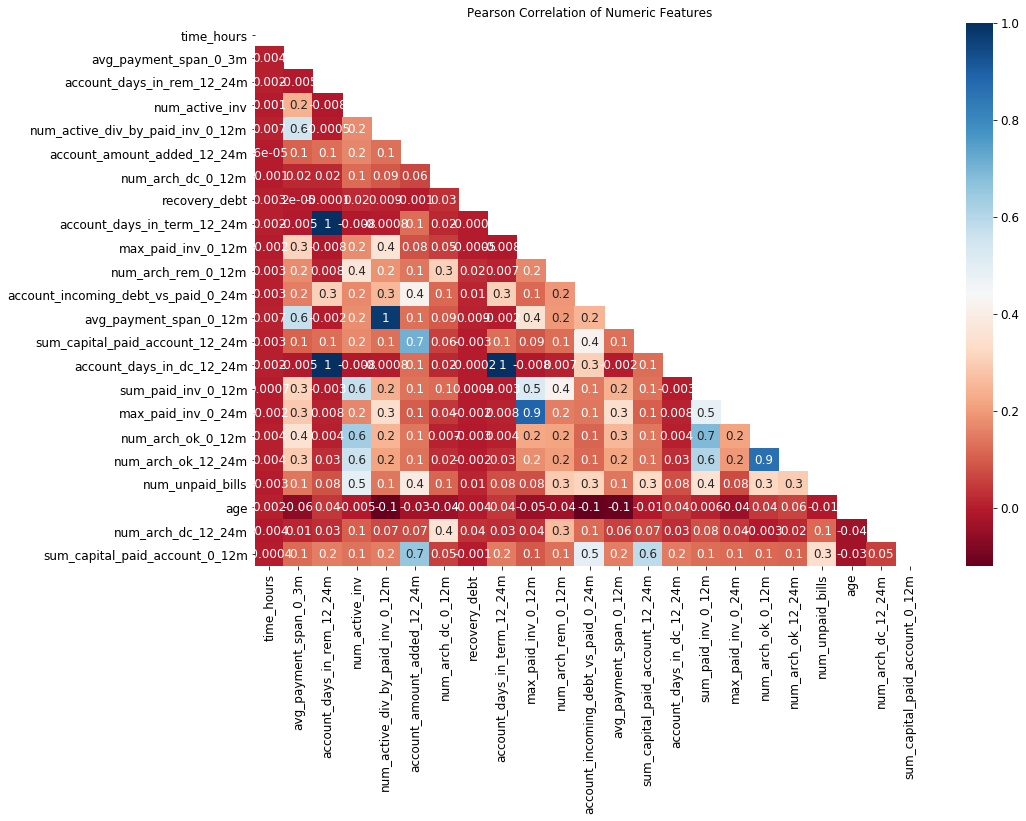

In [735]:
plt.figure(figsize=(15, 10))
pearsondf = X_imp[num_cols].corr('pearson')

mask = np.zeros_like(pearsondf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(pearsondf, annot=True, fmt=".0g", cmap="RdBu", mask=mask)
plt.title("Pearson Correlation of Numeric Features");

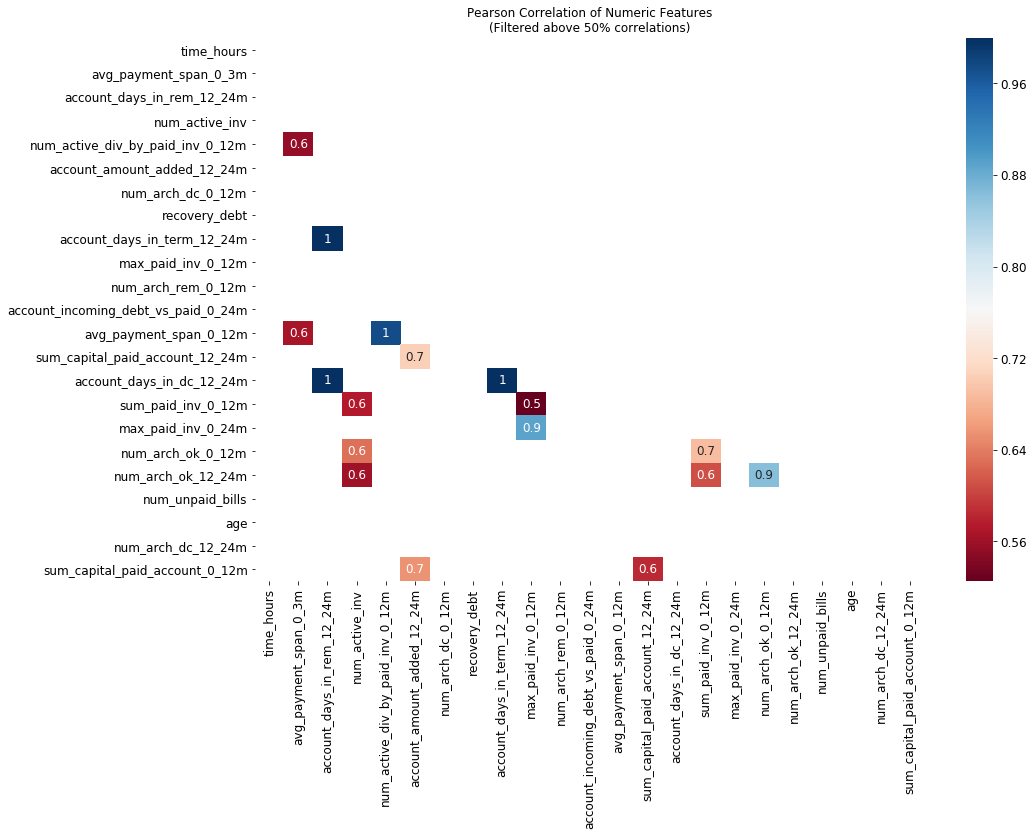

In [736]:
plt.figure(figsize=(15, 10))
filteredpearson = pearsondf[((pearsondf >= .50) | (pearsondf <= -.50)) & (pearsondf !=1.000)]
mask = np.zeros_like(filteredpearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(filteredpearson, annot=True, fmt=".0g", cmap="RdBu", mask=mask)
plt.title("Pearson Correlation of Numeric Features\n(Filtered above 50% correlations)");

#### Spearman Rank Correlation Among Ordinal Features

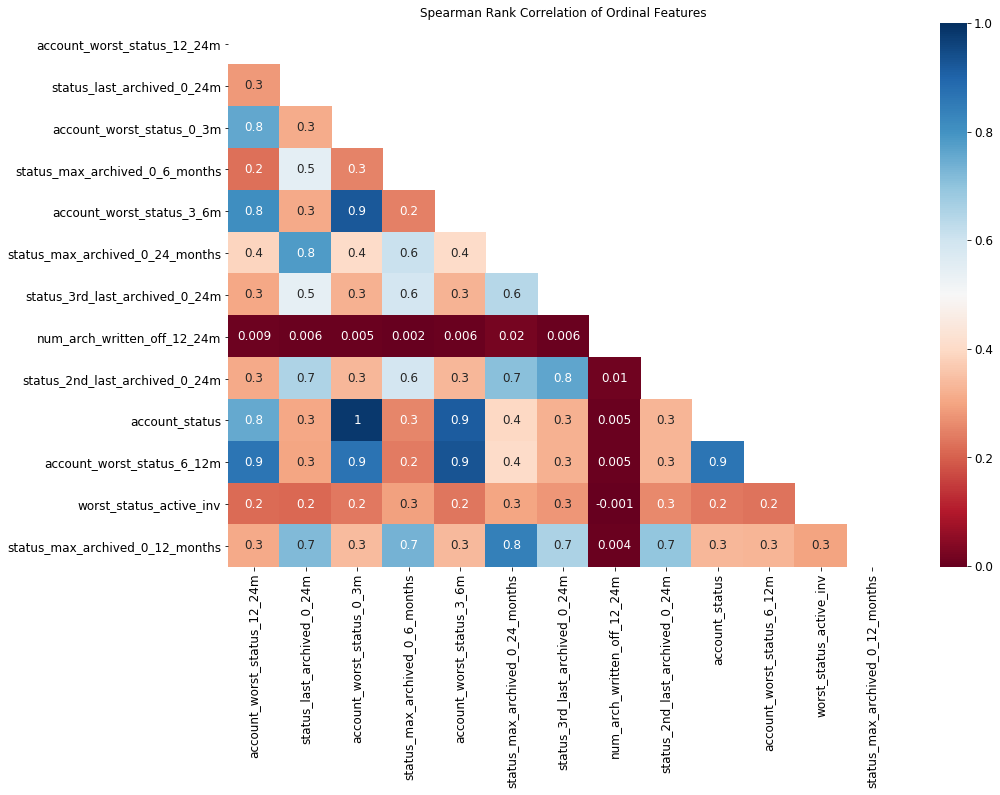

In [737]:
plt.figure(figsize=(15, 10))
spearmandf = X_imp[ord_cols].corr('spearman')

mask = np.zeros_like(spearmandf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(spearmandf, annot=True, fmt=".0g", cmap="RdBu", mask=mask)
plt.title("Spearman Rank Correlation of Ordinal Features");

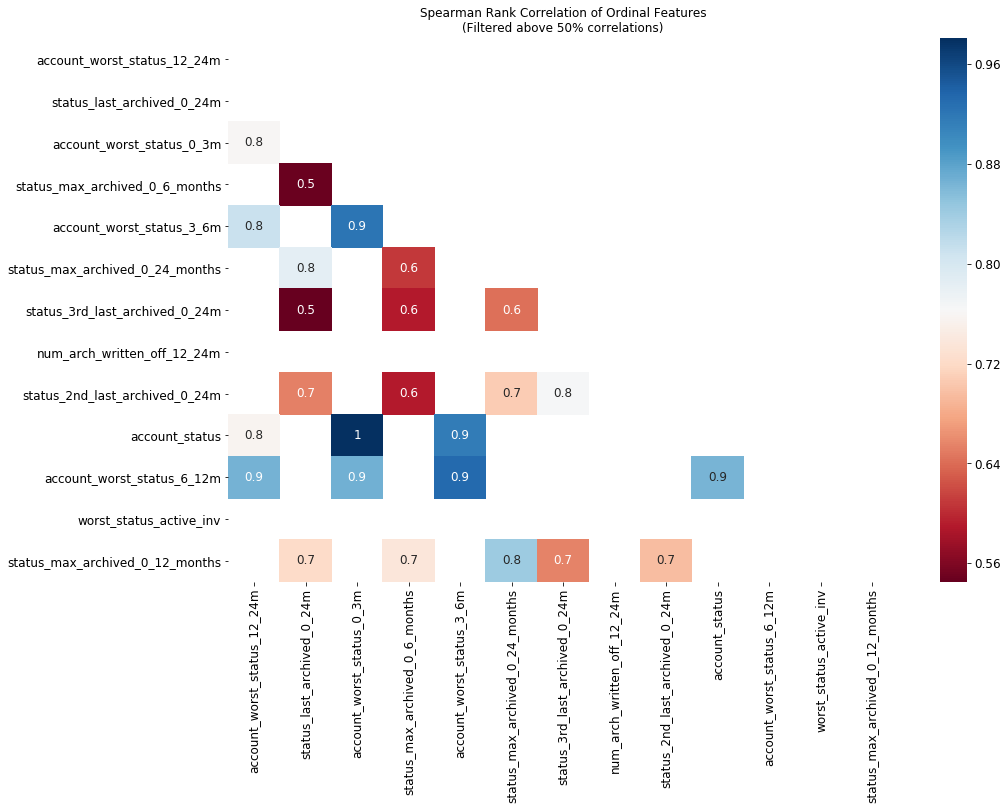

In [738]:
plt.figure(figsize=(15, 10))
filteredspearman = spearmandf[((spearmandf >= .50) | (spearmandf <= -.50)) & (spearmandf !=1.000)]
mask = np.zeros_like(filteredspearman, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(filteredspearman, annot=True, fmt=".0g", cmap="RdBu", mask=mask)
plt.title("Spearman Rank Correlation of Ordinal Features\n(Filtered above 50% correlations)");

#### Cramer's V for Categorical Features

In [739]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

crvdset = list()
print("Cramer's V Correlation Among Categorical Features\n")
for col1, col2 in combinations(cat_cols, 2):
    cramersv = cramers_v(X_imp[col1], X_imp[col2])
    crvdset.append([(col1, col2), cramersv])
    print(col1,"-", col2,":", "{0:.2%}".format(cramersv))

Cramer's V Correlation Among Categorical Features

merchant_category - merchant_group : 99.97%
merchant_category - name_in_email : 7.18%
merchant_category - has_paid : 21.29%
merchant_category - num_arch_written_off_0_12m : 15.77%
merchant_group - name_in_email : 4.79%
merchant_group - has_paid : 16.27%
merchant_group - num_arch_written_off_0_12m : 12.81%
name_in_email - has_paid : 5.33%
name_in_email - num_arch_written_off_0_12m : 4.31%
has_paid - num_arch_written_off_0_12m : 86.41%


#### Point Biserial Correlation of Numeric Features with the Target

In [11]:
def PointBiserialCorr(df, x, y):
    from scipy.stats import pointbiserialr
    df2 = df.dropna(subset=[x, y])
    corr, p_val = pointbiserialr(df2[x], df2[y])
    return corr, p_val

pbcorrs = {}
train_imp = pd.concat([X_imp, y], axis=1)

print("Point Biserial Correlation of Continuous Features with the Target")
print()
for col in num_cols:
    corr, p_val = PointBiserialCorr(train_imp, "default", col)
    pbcorrs[col] = (corr, p_val)
    print(col, "-", "default")
    print("---------------------")
    print("Correlation Coefficient:",corr)
    print("p-value:", p_val)
    if p_val > 0.05:
        print("Not Significant")
    else:
        print("Significant")
    print("="*50)
    

Point Biserial Correlation of Continuous Features with the Target

account_days_in_rem_12_24m - default
---------------------
Correlation Coefficient: 0.018460887563390337
p-value: 3.060802254155888e-08
Significant
account_amount_added_12_24m - default
---------------------
Correlation Coefficient: 0.0058191567442808295
p-value: 0.080897043104598
Not Significant
num_active_inv - default
---------------------
Correlation Coefficient: 0.01889475273557403
p-value: 1.4439206003316121e-08
Significant
num_arch_ok_0_12m - default
---------------------
Correlation Coefficient: -0.046578057277767836
p-value: 2.0956709710576817e-44
Significant
sum_paid_inv_0_12m - default
---------------------
Correlation Coefficient: -0.03558250695619357
p-value: 1.3103622073491708e-26
Significant
account_days_in_dc_12_24m - default
---------------------
Correlation Coefficient: 0.018015344601770865
p-value: 6.508151050675963e-08
Significant
num_arch_ok_12_24m - default
---------------------
Correlation Coeffic

In [741]:
def PlotCorrCoeffs(corrs):
    corrsdf = pd.DataFrame(corrs, index=["coef", "p_val"]).T
    filtered = corrsdf[corrsdf["p_val"] <= 0.05].sort_values("coef", ascending=True)

    filtered["coef"].plot(kind="barh", figsize=(10, 8))
    for idx in range(len(filtered["coef"])):
        plt.text(filtered["coef"][idx], idx-0.1, str(round(filtered["coef"][idx], 2)))

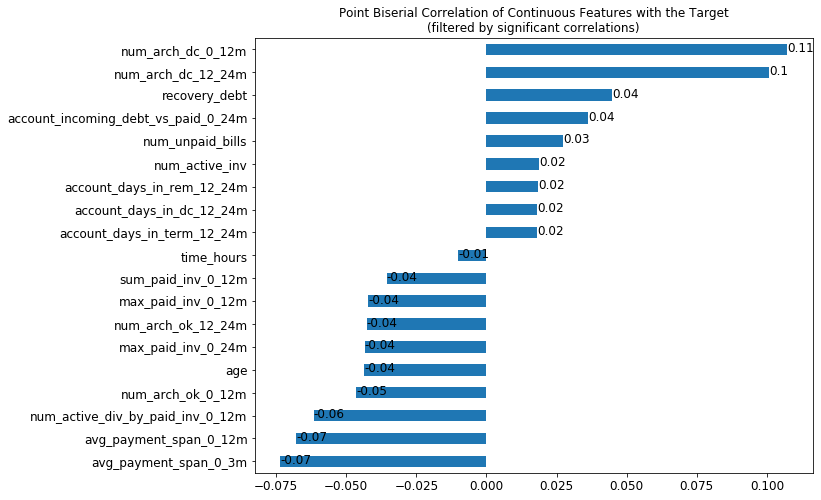

In [742]:
PlotCorrCoeffs(pbcorrs)
plt.title("Point Biserial Correlation of Continuous Features with the Target\n(filtered by significant correlations)");

As it can be seen from the chart above, there are no highly correlated continues feature with the target. Maximum correlation belongs to *num_arch_dc_0_12m* with around 11%.

#### Kendall's Tau Correlation of Ordinal Features with the Target

In [743]:
taucorrs = {}
print("Kendall's Tau Correlation of Ordinal Features with the Target")
print()
for col in ord_cols:
    df2 = train_imp.copy()
    df2 = df2.dropna(subset=[col])
    corr, p_val = kendalltau(df2["default"], df2[col])
    taucorrs[col] = (corr, p_val)
    print(col, "-", "default")
    print("---------------------")
    print("Correlation Coefficient:",corr)
    print("p-value:", p_val)
    if p_val > 0.05:
        print("Not Significant")
    else:
        print("Significant")
    print("="*50)
    

Kendall's Tau Correlation of Ordinal Features with the Target

account_worst_status_12_24m - default
---------------------
Correlation Coefficient: 0.036167423137027505
p-value: 3.004806808475012e-29
Significant
status_last_archived_0_24m - default
---------------------
Correlation Coefficient: 0.005196631717776202
p-value: 0.10740818469047748
Not Significant
account_worst_status_0_3m - default
---------------------
Correlation Coefficient: 0.06898726176652034
p-value: 1.1844579452990429e-100
Significant
status_max_archived_0_6_months - default
---------------------
Correlation Coefficient: -0.04885512269126201
p-value: 2.6363098496209056e-53
Significant
account_worst_status_3_6m - default
---------------------
Correlation Coefficient: 0.05054572831660033
p-value: 8.059521048361086e-55
Significant
status_max_archived_0_24_months - default
---------------------
Correlation Coefficient: 0.007002243459897876
p-value: 0.02441404472976701
Significant
status_3rd_last_archived_0_24m - default

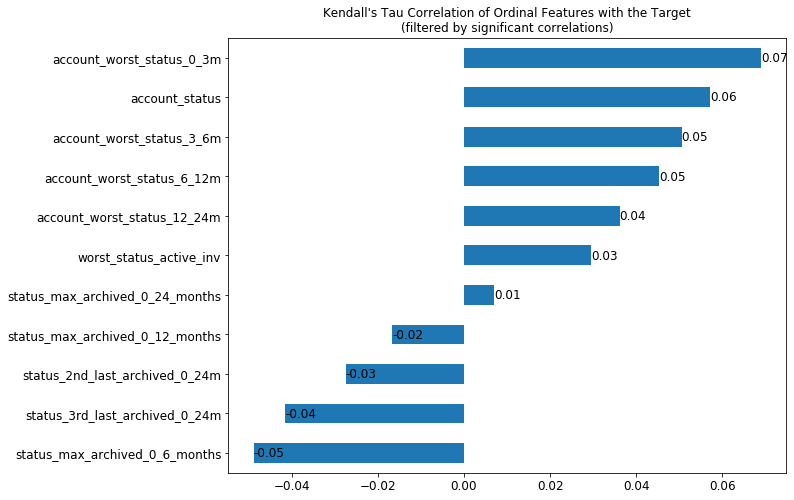

In [744]:
PlotCorrCoeffs(taucorrs)
plt.title("Kendall's Tau Correlation of Ordinal Features with the Target\n(filtered by significant correlations)");

#### Cramer's V Correlation of Categorical Features with the Target

In [745]:
crvcorrs = {}

print("Cramer's VCorrelation of Categorical Features with the Target")
print()
for col in cat_cols:
    corr = cramers_v(train_imp["default"], train_imp[col])
    crvcorrs[col] = corr
    print(col, "-", "default")
    print("---------------------")
    print("Correlation Coefficient:",corr)
    print("="*50)   

Cramer's VCorrelation of Categorical Features with the Target

merchant_category - default
---------------------
Correlation Coefficient: 0.09717378712994594
merchant_group - default
---------------------
Correlation Coefficient: 0.08089893877595795
name_in_email - default
---------------------
Correlation Coefficient: 0.02448499231845325
has_paid - default
---------------------
Correlation Coefficient: 0.031775689564704244
num_arch_written_off_0_12m - default
---------------------
Correlation Coefficient: 0.05802126280705401


### Feature Distributions 

#### Target-Feature Relationship

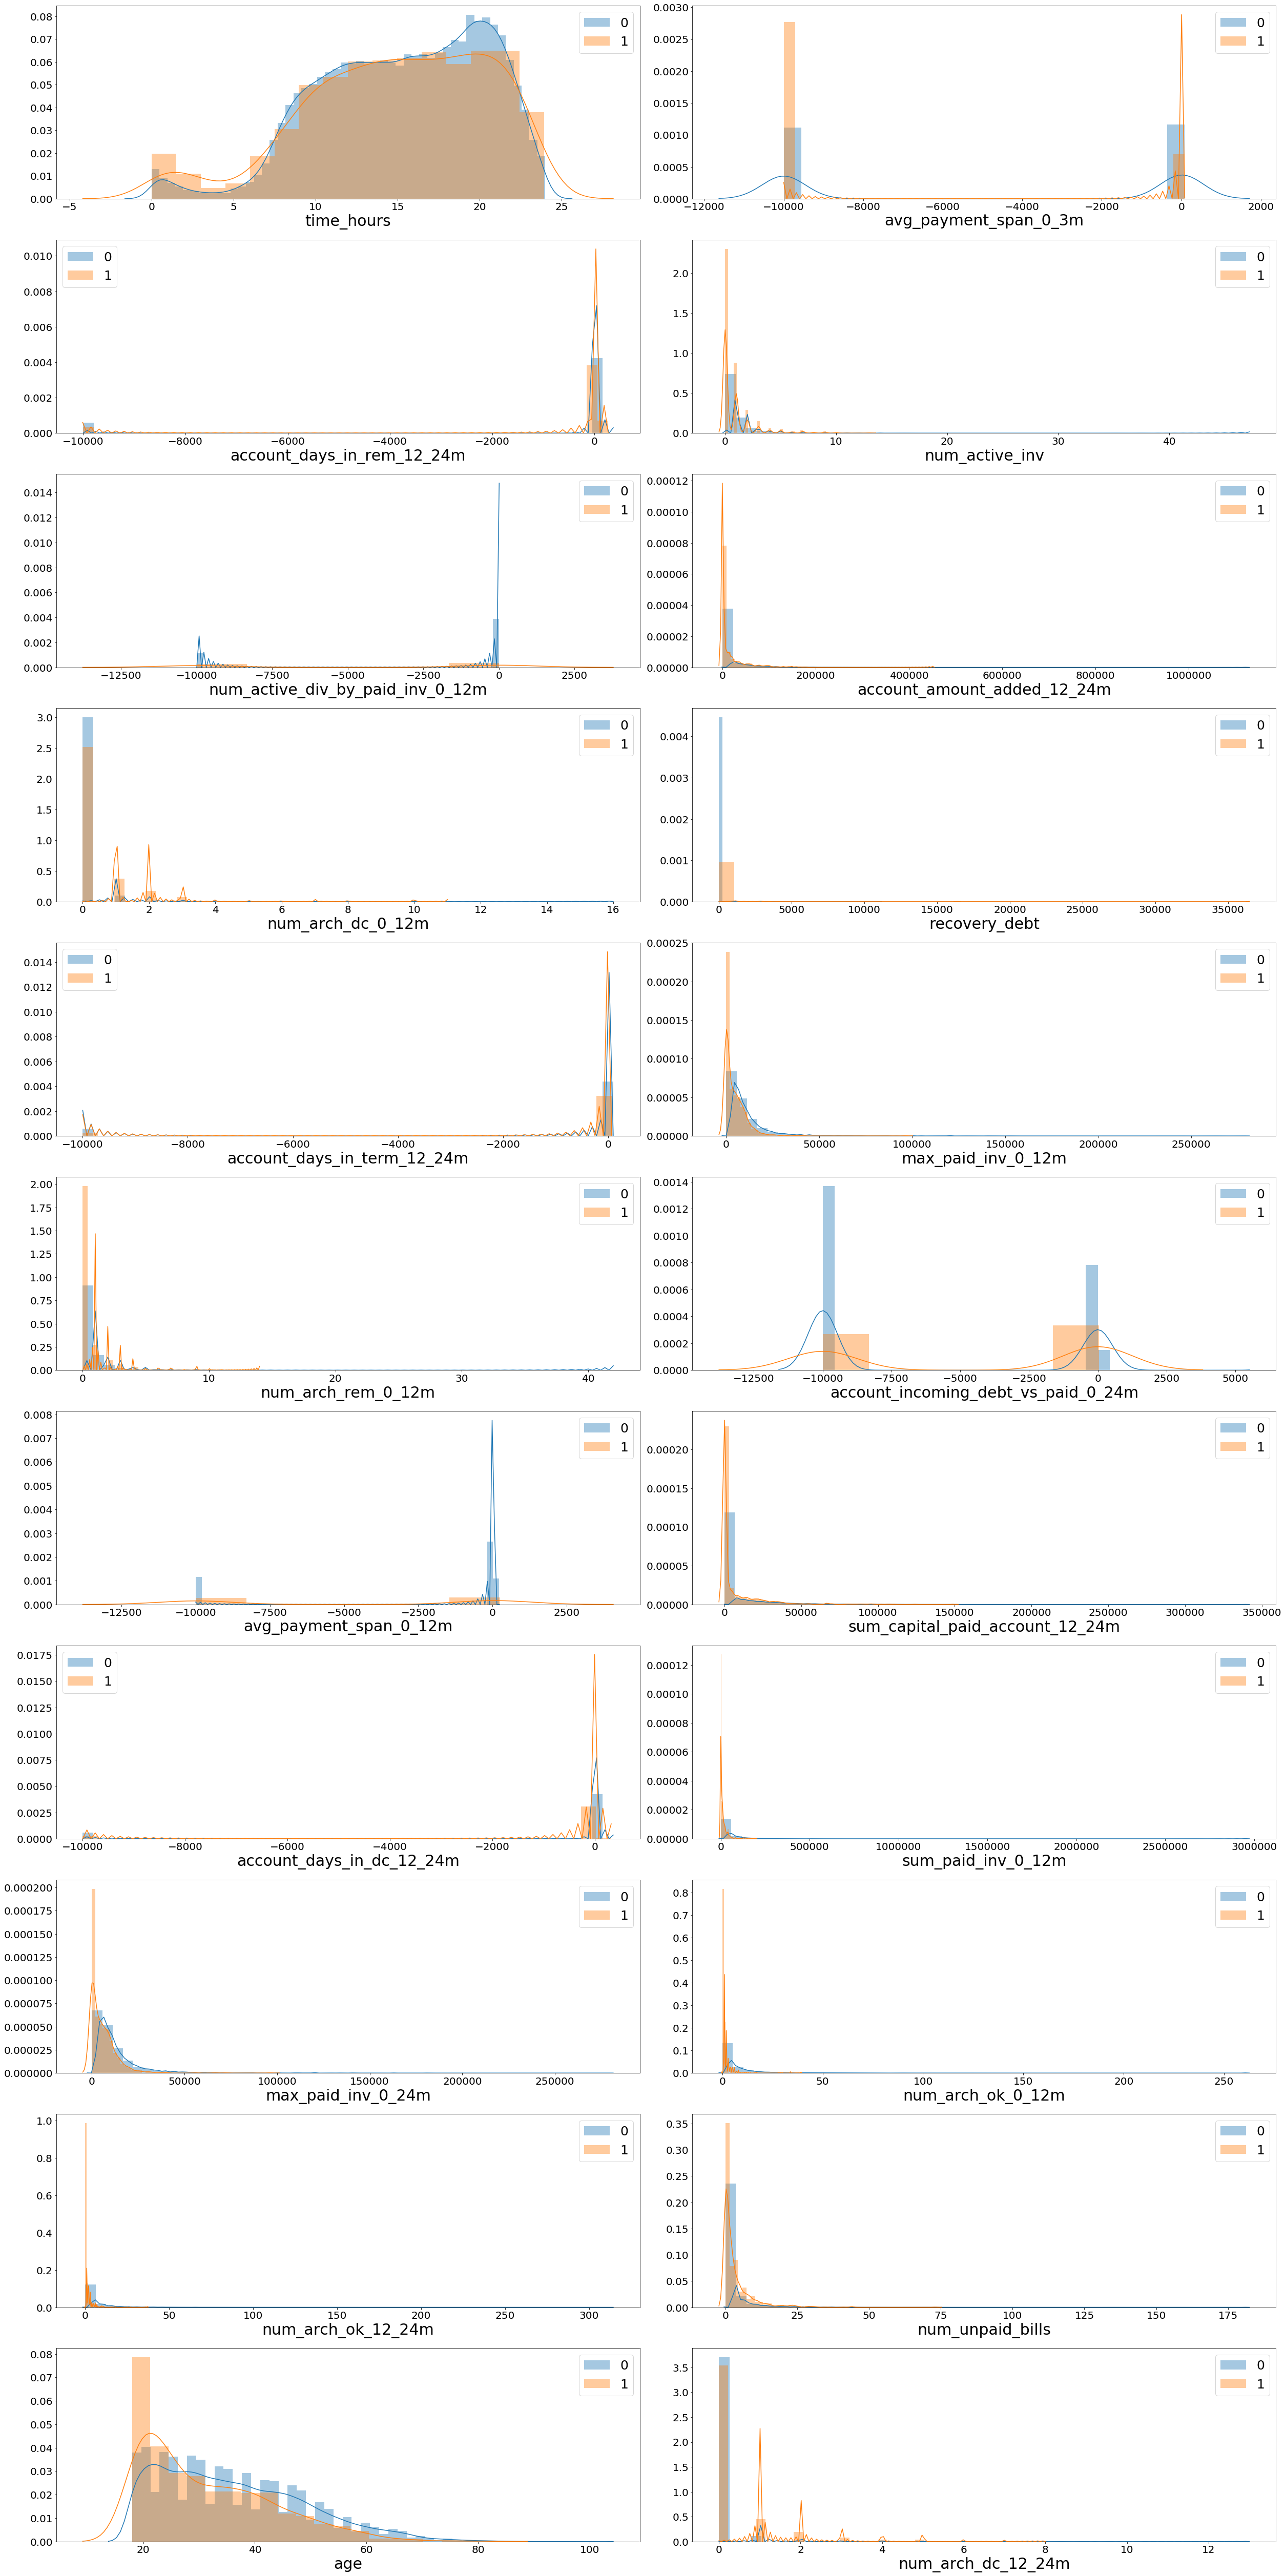

In [822]:
fig, axs = plt.subplots(int(len(num_cols)/2), 2, figsize=(35, 70))
for col, ax in zip(num_cols, product(range(int(len(num_cols)/2)), range(2))):
    b1 = sns.distplot(train_imp[train_imp["default"] == 0].dropna(subset=[col])[col], ax=axs[ax[0], ax[1]])
    b2 = sns.distplot(train_imp[train_imp["default"] == 1].dropna(subset=[col])[col], ax=axs[ax[0], ax[1]])
    b1.set_xlabel(col,fontsize=30)
    b1.tick_params(labelsize=20)
    b2.set_xlabel(col,fontsize=30)
    b2.tick_params(labelsize=20)
    b1.legend([0, 1], fontsize=25)
    b2.legend([0, 1], fontsize=25)    
    plt.tight_layout()

There are some differences in the distributions of the features in two target classes.

* avg_payment_span_0_3m
* avg_payment_span_0_12m features differs in their distribution for two classes of the target.

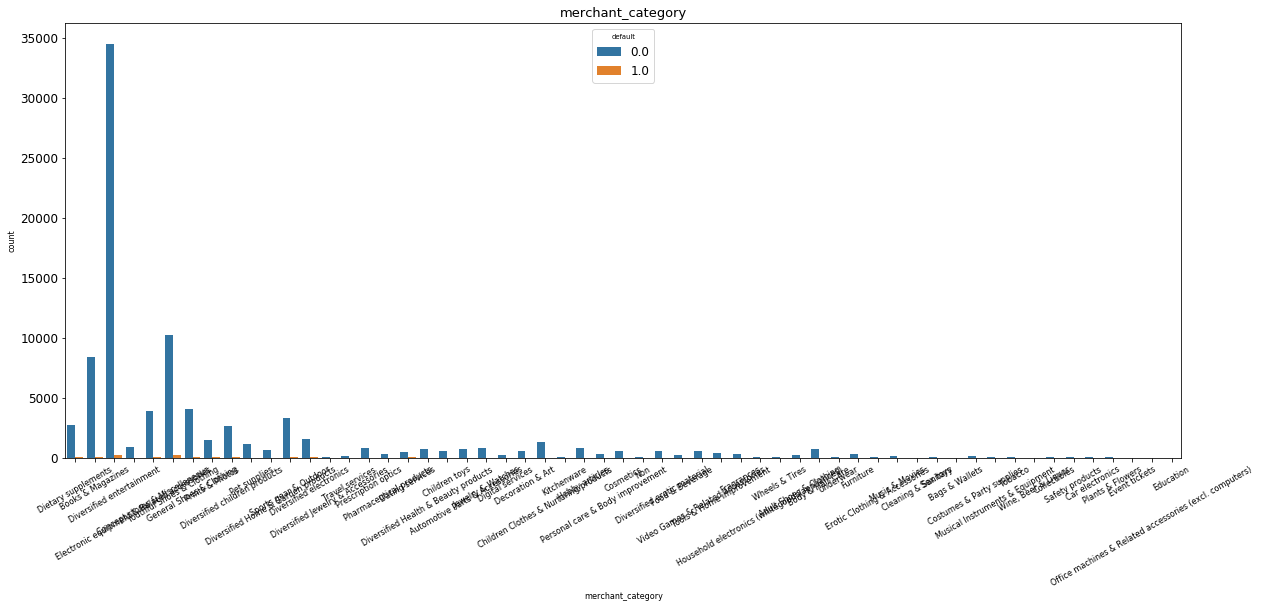

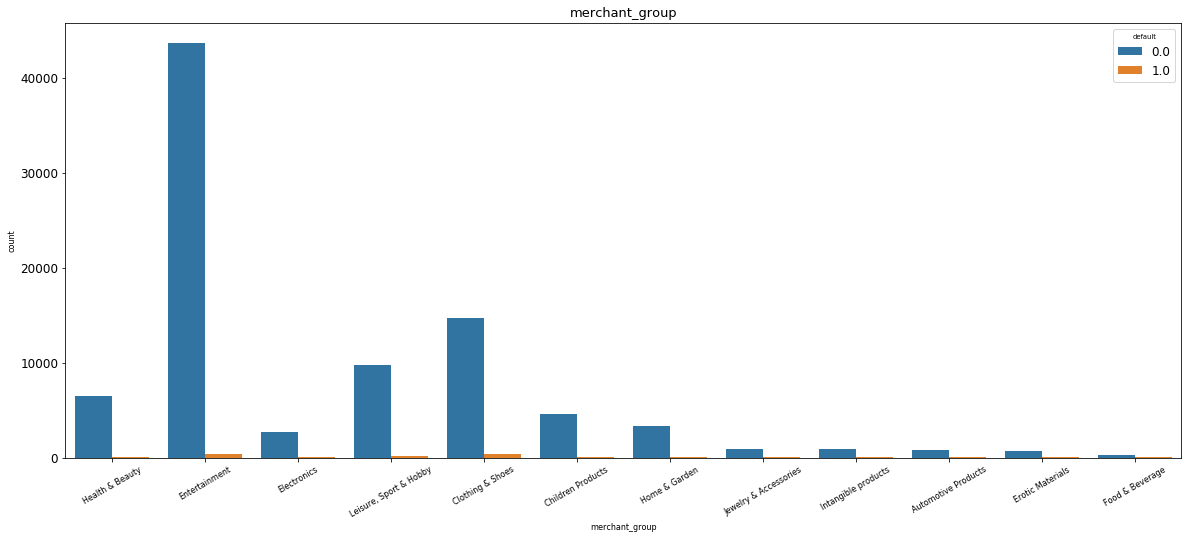

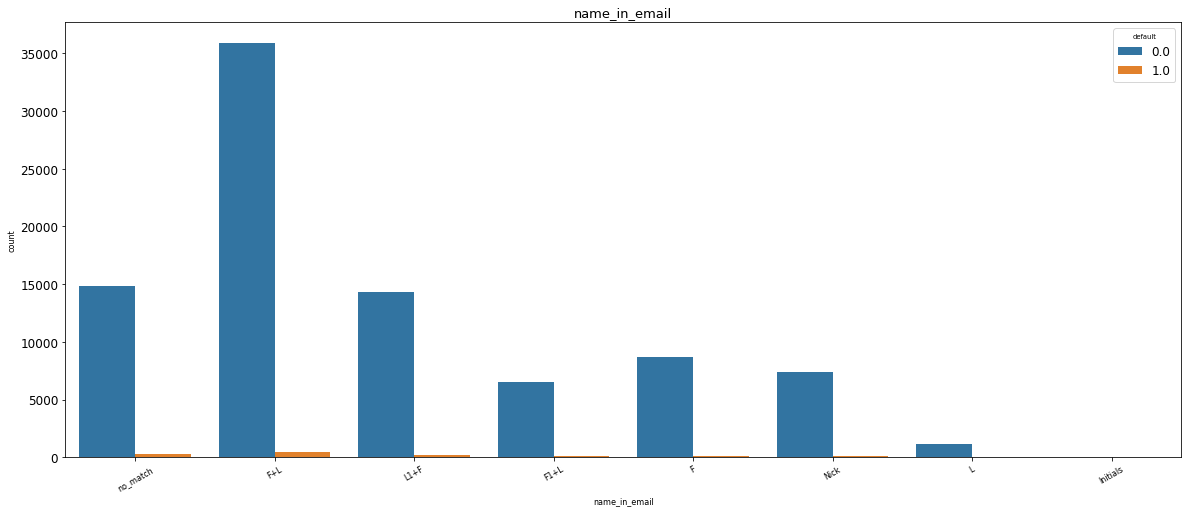

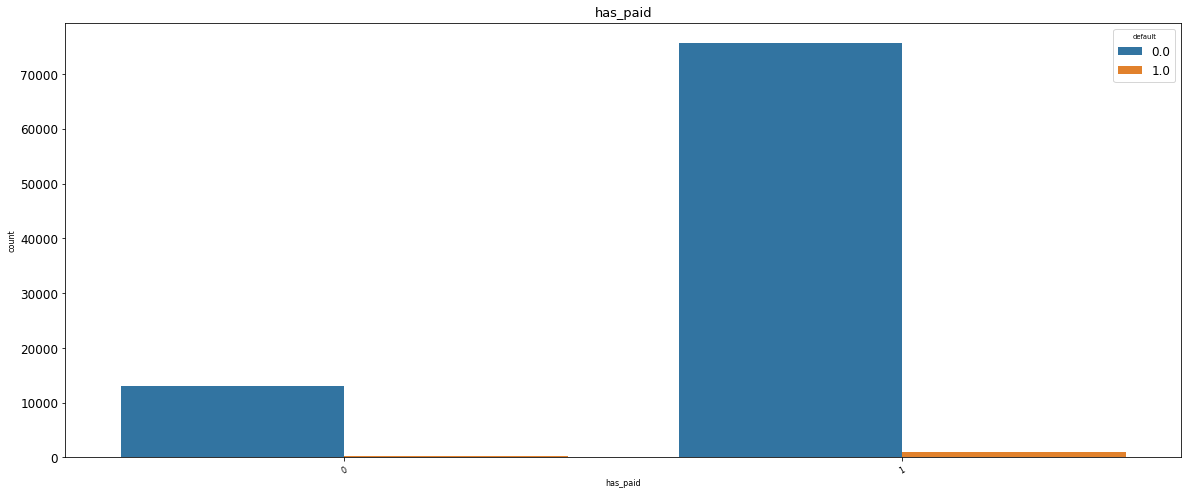

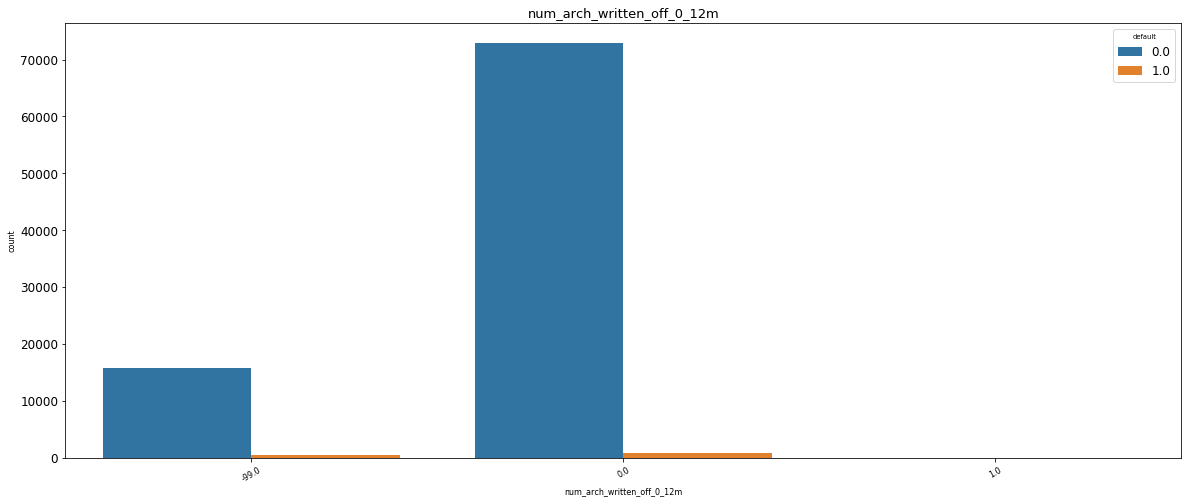

In [747]:
for idx in range(len(cat_cols)):
    plt.figure(figsize=(20, 8))
    sns.countplot(x=cat_cols[idx], hue="default", data=train_imp)
    plt.xticks(rotation=30, fontsize=8)
    plt.title(cat_cols[idx], fontsize=13)
  

There is one strong majority in each categorical feature. This may minimize the effect of the other values (categories) on the prediction task.

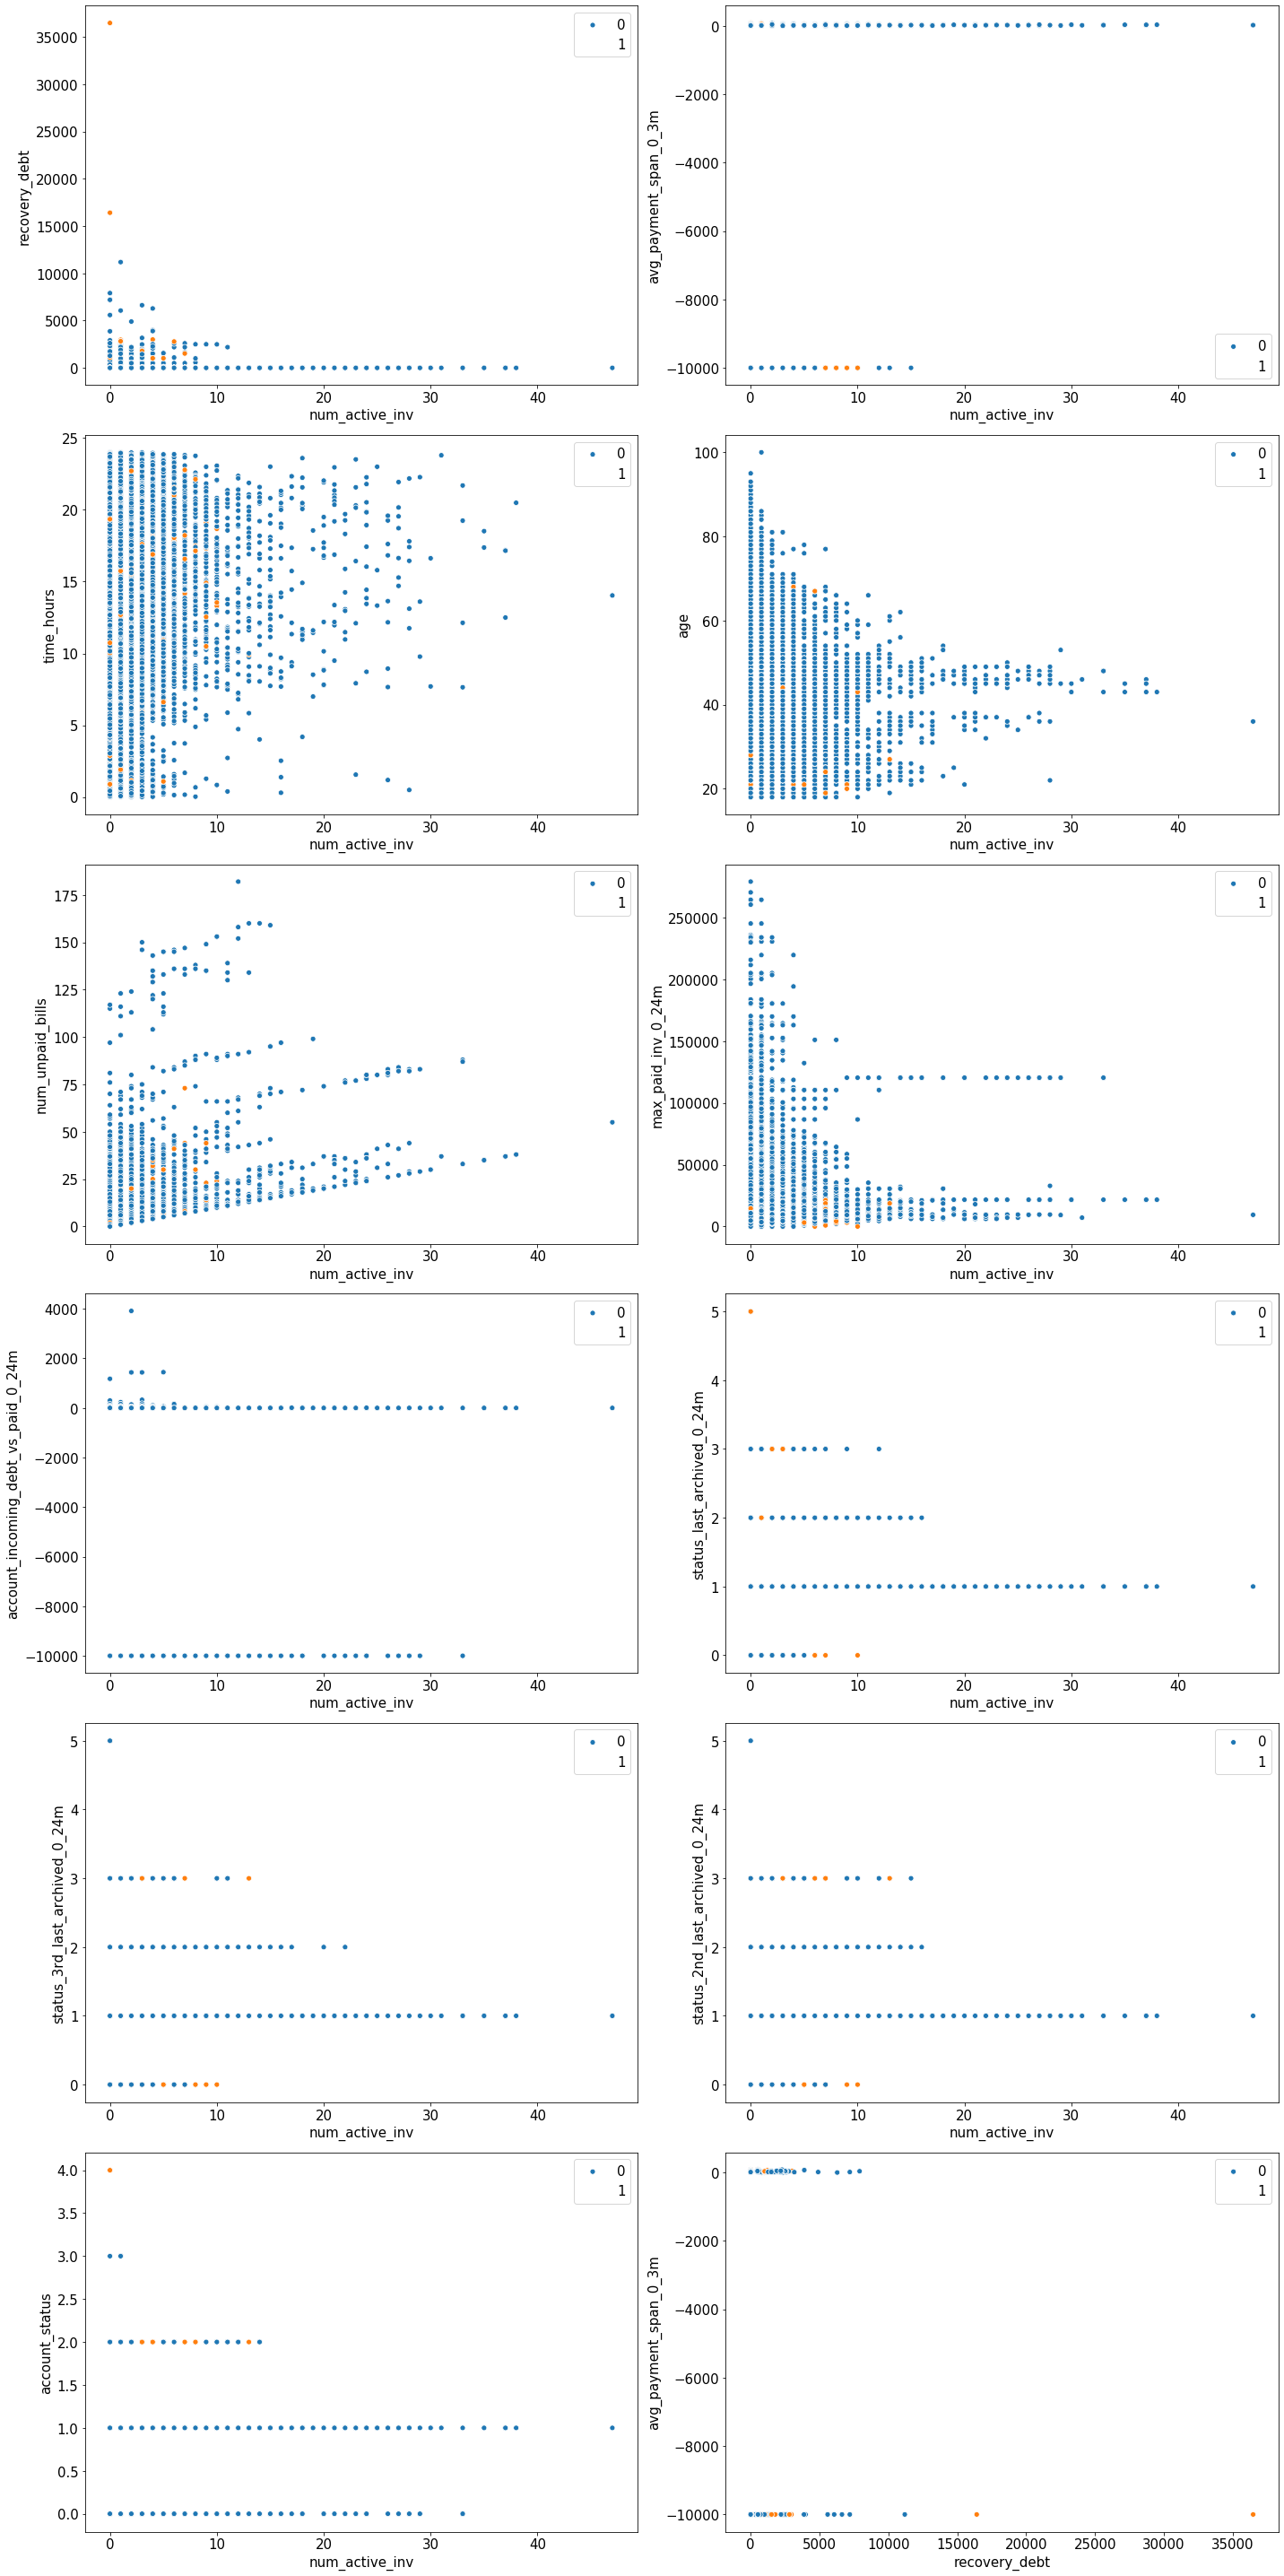

In [43]:
ord_cols_short = [feature for feature in ord_cols if '0_24m' in feature] + [feature for feature in ord_cols if 'account_status' == feature]

num_cols_short = [feature for feature in num_cols if '12' not in feature] 

fig, axs = plt.subplots(int(len(num_cols_short + ord_cols_short)/2), 2, figsize=(20, 40))
for pairs, ax in zip(combinations(num_cols_short + ord_cols_short, 2), product(range(int(len(num_cols_short + ord_cols_short)/2)), range(2))):
    b1 = sns.scatterplot(data=train_imp, x=pairs[0], y=pairs[1], hue='default',ax=axs[ax[0], ax[1]])
    b1.set_xlabel(pairs[0], fontsize=15)
    b1.set_ylabel(pairs[1], fontsize=15)
    b1.tick_params(labelsize=15)
    b1.legend([0, 1], fontsize=15)
    plt.tight_layout()    


* Higher the account_worst_status higher defaults
* Lower the recovery_debt higher defaults
* When account_amount_added is low defaults occur more
* As num_arch_dc increases defaults increase
* More defaults occur at younger ages
* At lower sum_capital_paid_account there is more default
* account_worst_status is highly correlated with defaults
* As avg_payment_span increases the defaults observed increases as well
* Greater the num_active_inv, less the defaults
* Lower account_amount_Added together with higher avg_payment_span results in more defaults
* Lower max_paid_inv together with higher avg_payment_span results in more defaults
* As avg_payment_span and account_days_in_rem increases number of defaults increses as ell  

### Correlation Elimination

In [749]:
#Dictionary for feature-target correlations
corrstarget = {}

#Correlation of numeric features with target
for key in pbcorrs:
    corrstarget[key] = pbcorrs[key][0]

#Correlation of ordinal features with target    
for key in taucorrs:
    corrstarget[key] = taucorrs[key][0]

#Correlation of categorical features with target    
for key in crvcorrs:
    corrstarget[key] = crvcorrs[key]
    
    
    
    
#Dictionary for feature-to-feature correlations

f_to_f_corrs = {}

pdf = (pearsondf.where(np.triu(np.ones(pearsondf.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

sdf = (spearmandf.where(np.triu(np.ones(spearmandf.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))


for pairs, corr in pdf.items():
    if pairs not in f_to_f_corrs:
        f_to_f_corrs[pairs] = corr
    
for pairs, corr in sdf.items():
    if pairs not in f_to_f_corrs:
        f_to_f_corrs[pairs] = corr
    
for pairs in crvdset:
    if pairs[0] not in f_to_f_corrs:
        f_to_f_corrs[pairs[0]] = pairs[1]

        
ftofdf = pd.DataFrame.from_dict(f_to_f_corrs, orient="index").reset_index().rename(columns={0:"corr", "index":"pairs"})

ftofdf["col1"] = [col[0] for col in ftofdf["pairs"]]
ftofdf["col2"] = [col[1] for col in ftofdf["pairs"]]
ftofdf.drop("pairs", axis=1, inplace=True)
ftofdf.head()    

,corr,col1,col2
0,0.999999,account_days_in_term_12_24m,account_days_in_dc_12_24m
1,0.999979,account_days_in_rem_12_24m,account_days_in_term_12_24m
2,0.999977,account_days_in_rem_12_24m,account_days_in_dc_12_24m
3,0.974829,num_active_div_by_paid_inv_0_12m,avg_payment_span_0_12m
4,0.889912,max_paid_inv_0_12m,max_paid_inv_0_24m


In [750]:
ftofdf["col1_target"] = ftofdf["col1"].map(corrstarget)
ftofdf["col2_target"] = ftofdf["col2"].map(corrstarget)
ftofdf.head()

,corr,col1,col2,col1_target,col2_target
0,0.999999,account_days_in_term_12_24m,account_days_in_dc_12_24m,0.017983,0.018015
1,0.999979,account_days_in_rem_12_24m,account_days_in_term_12_24m,0.018461,0.017983
2,0.999977,account_days_in_rem_12_24m,account_days_in_dc_12_24m,0.018461,0.018015
3,0.974829,num_active_div_by_paid_inv_0_12m,avg_payment_span_0_12m,-0.061680,-0.067828
4,0.889912,max_paid_inv_0_12m,max_paid_inv_0_24m,-0.042296,-0.043468


In [751]:
def eliminate(df):    
    if df["corr"] >= 0.50:
        if abs(df["col1_target"]) >= abs(df["col2_target"]):
            df["col1_res"] = 1
            df["col2_res"] = 0
        else:
            df["col1_res"] = 0
            df["col2_res"] = 1
    else:
        df["col1_res"] = 1
        df["col2_res"] = 1
    return df

ftofdf2 = ftofdf.apply(eliminate, axis=1)
ftofdf2.sort_values(["corr", "col1_target", "col2_target"], ascending=False).head(20)

,corr,col1,col2,col1_target,col2_target,col1_res,col2_res
0,0.999999,account_days_in_term_12_24m,account_days_in_dc_12_24m,0.017983,0.018015,0,1
1,0.999979,account_days_in_rem_12_24m,account_days_in_term_12_24m,0.018461,0.017983,1,0
2,0.999977,account_days_in_rem_12_24m,account_days_in_dc_12_24m,0.018461,0.018015,1,0
331,0.999750,merchant_category,merchant_group,0.097174,0.080899,1,0
253,0.980810,account_worst_status_0_3m,account_status,0.068987,0.057184,1,0
3,0.974829,num_active_div_by_paid_inv_0_12m,avg_payment_span_0_12m,-0.061680,-0.067828,0,1
254,0.931761,account_worst_status_3_6m,account_worst_status_6_12m,0.050546,0.045271,1,0
255,0.922116,account_worst_status_0_3m,account_worst_status_3_6m,0.068987,0.050546,1,0
256,0.915652,account_worst_status_3_6m,account_status,0.050546,0.057184,0,1
4,0.889912,max_paid_inv_0_12m,max_paid_inv_0_24m,-0.042296,-0.043468,0,1


In [752]:
eliminated_features = set()

for idx in ftofdf2.index:
    feature1 = ftofdf2[ftofdf2.index == idx]["col1"].values[0]
    feature2 = ftofdf2[ftofdf2.index == idx]["col2"].values[0]
    res1 = ftofdf2[ftofdf2.index == idx]["col1_res"].values[0]
    res2 = ftofdf2[ftofdf2.index == idx]["col2_res"].values[0]
    
    if res1 == 0:
        eliminated_features.add(feature1)
    if res2 == 0:
        eliminated_features.add(feature2)

In [753]:
print("Features that are eliminated by high correlation:\n")
for feature in eliminated_features:
    print(feature)

qualified_features = []    
print("\nFeatures that have passed from correlation analysis:\n")
for feature in X.columns:
    if feature not in eliminated_features:
        qualified_features.append(feature)
        print(feature)

Features that are eliminated by high correlation:

status_max_archived_0_24_months
status_2nd_last_archived_0_24m
num_active_inv
num_active_div_by_paid_inv_0_12m
account_worst_status_12_24m
status_last_archived_0_24m
account_days_in_term_12_24m
max_paid_inv_0_12m
status_3rd_last_archived_0_24m
merchant_group
avg_payment_span_0_12m
sum_capital_paid_account_12_24m
status_max_archived_0_12_months
account_days_in_dc_12_24m
sum_paid_inv_0_12m
account_worst_status_3_6m
num_arch_ok_12_24m
has_paid
account_status
account_worst_status_6_12m
sum_capital_paid_account_0_12m

Features that have passed from correlation analysis:

account_amount_added_12_24m
account_days_in_rem_12_24m
account_incoming_debt_vs_paid_0_24m
account_worst_status_0_3m
age
avg_payment_span_0_3m
merchant_category
max_paid_inv_0_24m
name_in_email
num_arch_dc_0_12m
num_arch_dc_12_24m
num_arch_ok_0_12m
num_arch_rem_0_12m
num_arch_written_off_0_12m
num_arch_written_off_12_24m
num_unpaid_bills
status_max_archived_0_6_months
recov

In [754]:
with open('qualified_features.pkl', 'wb') as f:
    pickle.dump(qualified_features, f)

<Figure size 1080x720 with 0 Axes>

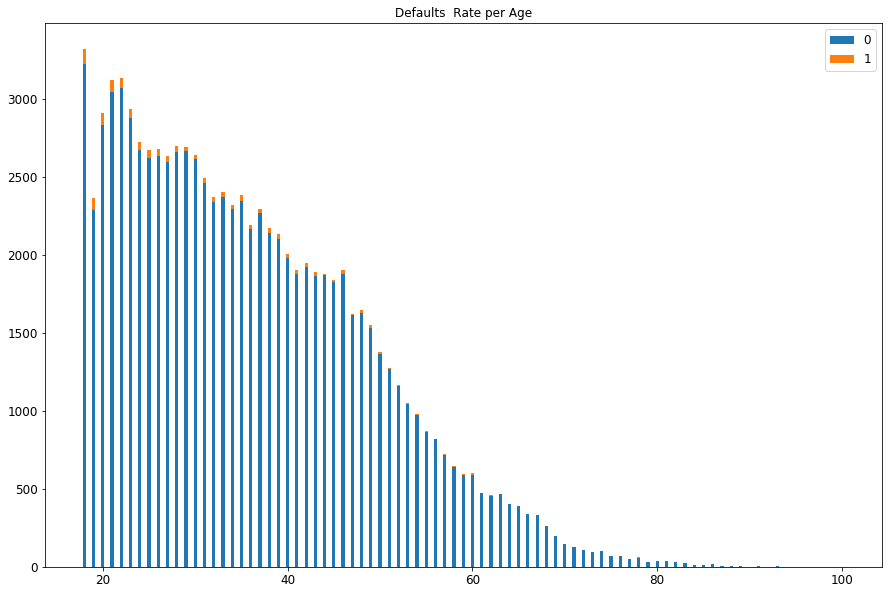

In [823]:
plt.figure(figsize=(15, 10))

width = 0.35     
fig, ax = plt.subplots(figsize=(15, 10))
ages = list(set(list(train_imp['age'].unique())))
age_sum = train_imp.groupby("age")["default"].sum()
age_count = train_imp.groupby("age")["default"].count()
age_nodefault = age_count - age_sum
ax.bar(ages, age_nodefault, width, label='0')
ax.bar(ages,age_sum, width,bottom=age_nodefault, label='1')
plt.title("Defaults  Rate per Age")
plt.legend()
plt.show()


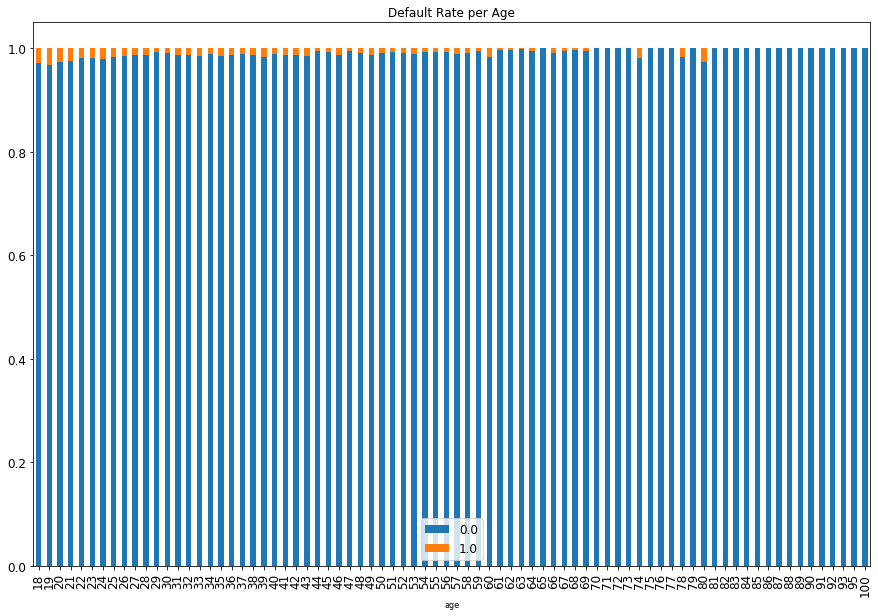

In [826]:
(train_imp.groupby('age')['default'].value_counts(normalize=True)
   .unstack('default').plot.bar(stacked=True, figsize=(15, 10))
)
plt.title("Default Rate per Age")
plt.legend();

For the Age feature we may consider bining the values into age groups in order to detect a pattern and if there is, increase the information extracted from the feature. 

We see that at the younger ages, default rate seems to be higher. However, at some of the older ages like 80 we see default rates closer to the younger ages.